# MPlots - Eamonn
> Following Eammon samples of Motif discovery

## Insects

### Download  & convert dataset

In [ ]:
from dvats.load import download_file_from_google_drive, unzip_mat, mat2csv, zip_contents
import os

In [ ]:
file_id = '1qq1z2mVRd7PzDqX0TDAwY7BcWVjnXUfQ'
data_path = os.path.expanduser('~/data')
destination = os.path.join(data_path, 'InsectData-fig11.zip')

In [ ]:
download_file_from_google_drive(file_id, destination)
mat_files = zip_contents(destination)
print(unzip_mat('all', destination, data_path))

/home/macu/data/InsectData-fig11.zip
File downloaded as: /home/macu/data/InsectData-fig11.zip
--> Unzip_mat all /home/macu/data/InsectData-fig11.zip /home/macu/data  True
['Insect_one_million.mat']
['Insect_one_million.mat'] extracted to /home/macu/data


In [ ]:
mat_name = mat_files[0]

In [ ]:
mat2csv(data_path+"/"+mat_name, print_flag = True)

(1000000, 1)


,Insect_one_million
0,0.236820
1,0.236820
2,0.238040
3,0.206300
4,0.026855


Matlab matrix 'Insect_one_million' converted to CSV in: ~/data/Insect_one_million.csv


In [ ]:
import pandas as pd

In [ ]:
mat_name = mat_name.split('.')[0]
mat_name

'Insect_one_million'

In [ ]:
df = pd.read_csv(data_path+'/'+mat_name+'.csv')

In [ ]:
print(df.shape)
display(df.head(5))

(1000000, 1)


,Insect_one_million
0,0.236820
1,0.236820
2,0.238040
3,0.206300
4,0.026855


In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.gridspec import GridSpec

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [ ]:
def plot_dataFrame(title, df):
    num_vars = len(df.columns)
    fig = plt.figure(figsize=(10, num_vars * 3))  # Ajusta el tamaño del plot según el número de variables
    gs = GridSpec(num_vars, 1)

    for i, var in enumerate(df.columns):
        ax = fig.add_subplot(gs[i])
        ax.plot(df.index, df[var], label=var)  # Asumiendo que df.index contiene los valores temporales
        ax.set_title(f"{var}")
        ax.set_xlabel("Time")
        ax.set_ylabel(var)
        ax.legend()

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()
        
    

In [ ]:
df.shape

(1000000, 1)

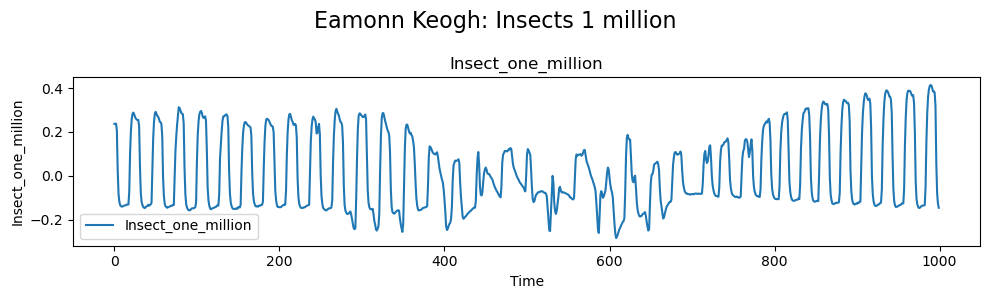

In [ ]:
plot_dataFrame("Eamonn Keogh: Insects 1 million", df[:1000])

In [ ]:
def plot_dataFrame_variable_with_intervals(title, df, var_num, interval=10000):
    if var_num >= len(df.columns):
        raise ValueError("var_num is out of the range of DataFrame columns")
    
    var = df.columns[var_num]
    data = df[var]
    num_intervals = len(data) // interval + 1  # Calcula el número necesario de intervalos/subplots

    fig = plt.figure(figsize=(10, num_intervals * 3))  # Ajusta el tamaño del plot según el número de intervalos
    gs = GridSpec(num_intervals, 1)

    for i in range(num_intervals):
        ax = fig.add_subplot(gs[i])
        start_idx = i * interval
        end_idx = start_idx + interval

        # Si es el último intervalo, ajusta end_idx para incluir el resto de los datos
        if i == num_intervals - 1:
            end_idx = len(data)

        ax.plot(np.arange(start_idx, end_idx), data[start_idx:end_idx], label=f"{var} [{start_idx}, {end_idx}]")
        ax.set_title(f"{var} [{start_idx}, {end_idx}]")
        ax.set_xlabel("Index")
        ax.set_ylabel(var)
        ax.legend()

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

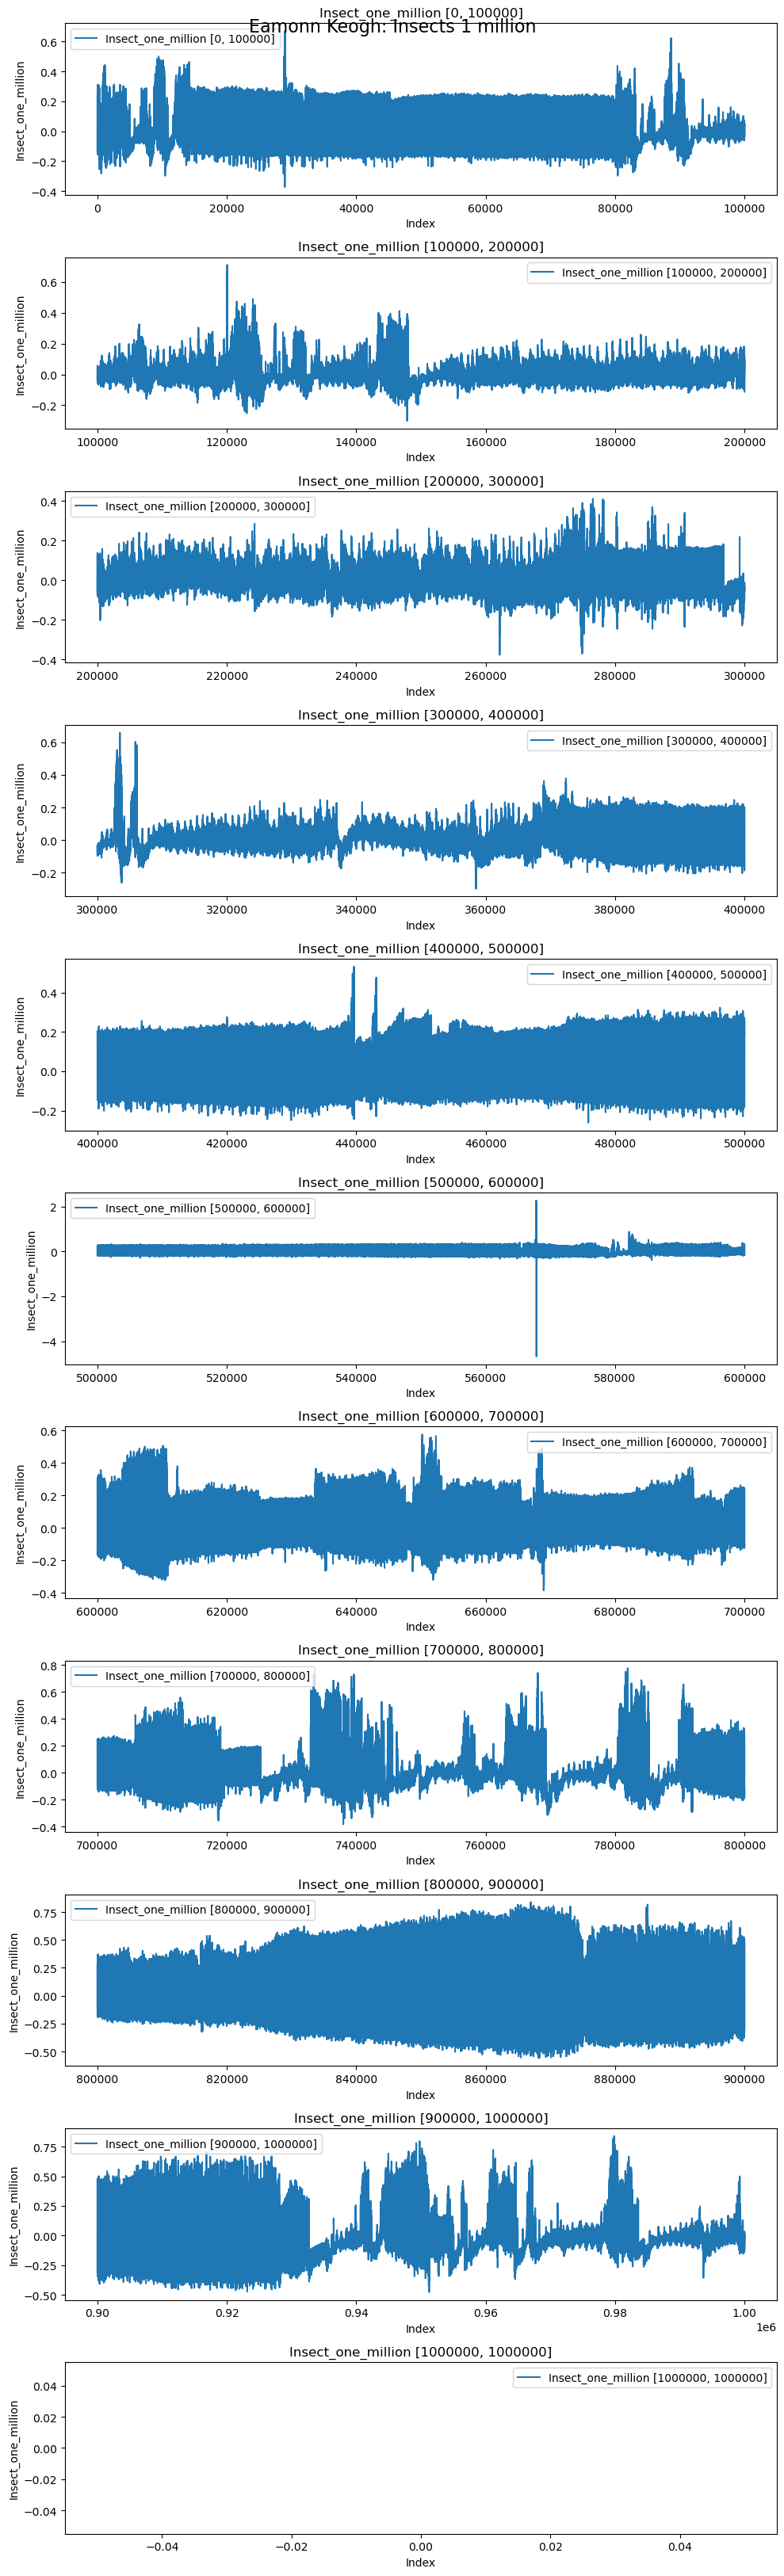

In [ ]:
plot_dataFrame_variable_with_intervals("Eamonn Keogh: Insects 1 million", df, 0, 100000)